<a href="https://colab.research.google.com/github/DonRoboto/CursoMOO/blob/main/MOO_SumW_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
from sympy import *
import matplotlib.pyplot as plt
import scipy, pylab


In [2]:
p_1 = [i/100 for i in range(0, 101)]
p_2=[]

for i in range(len(p_1)):
  p_2.append(round(1-p_1[i],2))


In [3]:
x = Symbol('x')
y = Symbol('y')

#Tarea 1
f1 = (x-1)**2 + (y-1)**4
f2 = (x+1)**2 + (y+1)**2


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


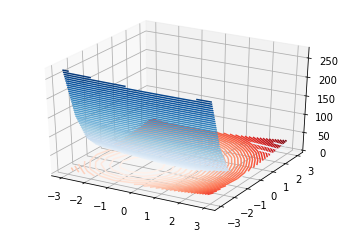

In [4]:
#graficamente
def fg1(x, y):
  return ((x-1)**2) + ((y-1)**4)
      
def fg2(x, y):
  return ((x+1)**2) + ((y+1)**2)


xg = np.linspace(-3, 3, 10)
yg = np.linspace(-3, 3, 10)

Xg, Yg = np.meshgrid(xg, yg)

Zg1 = fg1(Xg, Yg)
Zg2 = fg2(Xg, Yg)

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(Xg, Yg, Zg1, 50, cmap='Blues')
ax.contour3D(Xg, Yg, Zg2, 50, cmap='Reds')


Text(0, 0.5, 'f2')

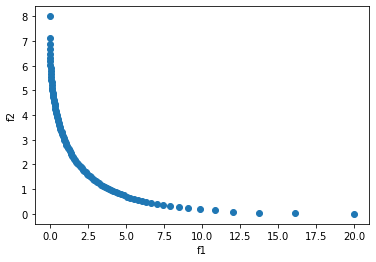

In [5]:
g1 = []
g2 = []

for i in range(len(p_1)):
  w1 = p_1[i]
  w2 = p_2[i]
  
  fx = (w1 * f1) + (w2 * f2)

  dx = fx.diff(x)
  dy = fx.diff(y)

  sol = solve((dx, dy),(x, y))

  if len(sol)>2:
    xs = sol[0][0]
    ys = sol[0][1]    
  else:
    xs = sol[x]
    ys = sol[y]

  
  f1s = f1.subs([ (x, xs), (y, ys) ] ).doit()
  f2s = f2.subs([ (x, xs), (y, ys) ] ).doit()

  g1.append(f1s)    
  g2.append(f2s)    


ax = pylab.subplot(111)
ax.scatter(g1, g2)
ax.figure.show()

ax.set_xlabel('f1')
ax.set_ylabel('f2')